In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
BATCH_SIZE = 100

def load_image(img_path,size = (32, 32)):
    label_img = tf.constant(1, tf.int8) if tf.strings.regex_full_match(img_path,".*/automobile/.*") else tf.constant(0, tf.int8)
    img_content = tf.io.read_file(img_path)
    img_content = tf.image.decode_jpeg(img_content) #注意此处为jpeg格式
    img_content = tf.image.resize(img_content, size) / 255.0

    return img_content, label_img

In [3]:
dir_data = "/home/sq/data/eat_tensorflow2_in_30_days"
path_train = os.path.join(dir_data, "cifar2/train/*/*.jpg")
path_test = os.path.join(dir_data, "cifar2/test/*/*.jpg")
print(f"path_train = {path_train}")
print(f"path_test = {path_test}")

#使用并行化预处理num_parallel_calls 和预存数据prefetch来提升性能
ds_train = tf.data.Dataset.list_files(path_train) \
           .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
           .shuffle(buffer_size = 1000).batch(BATCH_SIZE) \
           .prefetch(tf.data.experimental.AUTOTUNE)  

ds_test = tf.data.Dataset.list_files(path_test) \
           .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
           .batch(BATCH_SIZE) \
           .prefetch(tf.data.experimental.AUTOTUNE)

ds_train

path_train = /home/sq/data/eat_tensorflow2_in_30_days/cifar2/train/*/*.jpg
path_test = /home/sq/data/eat_tensorflow2_in_30_days/cifar2/test/*/*.jpg


<PrefetchDataset shapes: ((None, 32, 32, None), (None,)), types: (tf.float32, tf.int8)>

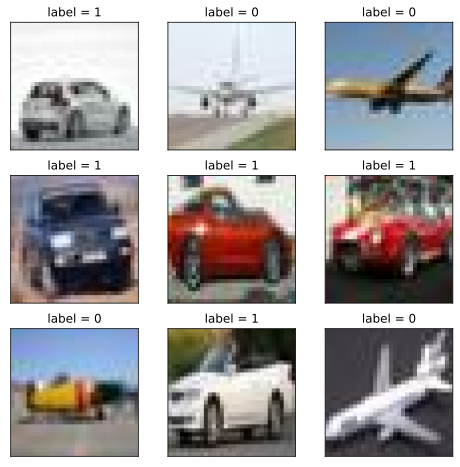

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#查看部分样本
from matplotlib import pyplot as plt 

plt.figure(figsize=(8,8))

for i,(img,label) in enumerate(ds_train.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 

plt.show()